<a href="https://colab.research.google.com/github/ilunxey/System_Programing/blob/main/%EC%8B%9C%EC%8A%A4%ED%85%9C%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D_%EC%A4%91%EA%B0%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import re
import pandas as pd
import matplotlib.pyplot as plt

1s Interval 0s: Current IOPS=5588
1s Interval 0s: Current Throughput=87.32 MB/s
1s Interval 1s: Current IOPS=12411
1s Interval 1s: Current Throughput=193.92 MB/s
1s Interval 2s: Current IOPS=12333
1s Interval 2s: Current Throughput=192.7 MB/s
1s Interval 3s: Current IOPS=10760
1s Interval 3s: Current Throughput=168.12 MB/s
1s Interval 4s: Current IOPS=6226
1s Interval 4s: Current Throughput=97.28 MB/s
10s Interval 0s: Erased Blocks=400, Valid Page Count=441500
1s Interval 5s: Current IOPS=6765
1s Interval 5s: Current Throughput=105.68 MB/s
1s Interval 6s: Current IOPS=6908
1s Interval 6s: Current Throughput=107.94 MB/s
1s Interval 7s: Current IOPS=7163
1s Interval 7s: Current Throughput=111.92 MB/s
1s Interval 8s: Current IOPS=7256
1s Interval 8s: Current Throughput=113.38 MB/s
1s Interval 9s: Current IOPS=7630
1s Interval 9s: Current Throughput=119.22 MB/s
1s Interval 10s: Current IOPS=8029
1s Interval 10s: Current Throughput=125.43 MB/s
1s Interval 11s: Current IOPS=8032
1s Interval 

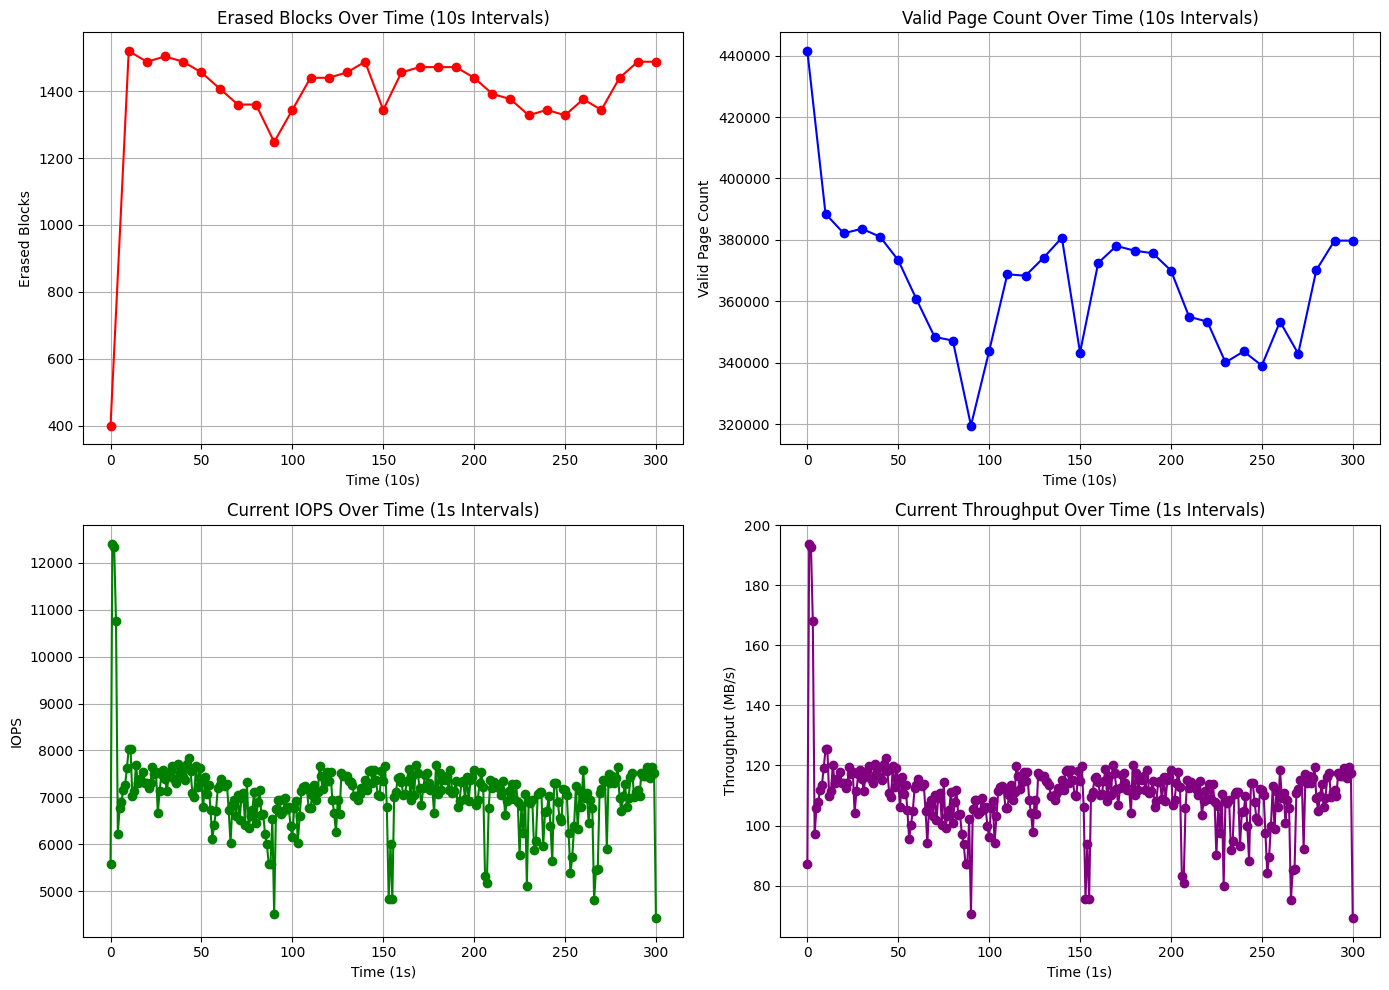

In [34]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# 로그 파일 경로
log_file_path = 'fio_log_2.txt'

# 데이터 저장을 위한 딕셔너리 초기화
data_10s = {
    'Time (10s)': [],
    'Erased Blocks': [],
    'Valid Page Count': []
}

data_1s = {
    'Time (1s)': [],
    'Current IOPS': [],
    'Current Throughput (MB/s)': []
}

# 정규 표현식을 사용하여 필요한 데이터 패턴 정의
erased_blocks_pattern = re.compile(r'Erased blocks:\s+(\d+)')
valid_page_count_pattern = re.compile(r'Valid page count:\s+(\d+)')
current_iops_pattern = re.compile(r'Current IOPS:\s+(\d+)')
current_throughput_pattern = re.compile(r'Current Throughput:\s+([\d\.]+) MB/s')

# 파일 읽기
with open(log_file_path, 'r') as file:
    lines = file.readlines()

# 데이터 추출
iteration_10s = 0
iteration_1s = 0
line_index = 0
total_lines = len(lines)

while line_index < total_lines:
    line = lines[line_index].strip()

    # Erased blocks
    erased_blocks_match = erased_blocks_pattern.match(line)
    if erased_blocks_match:
        erased_blocks = int(erased_blocks_match.group(1))

        # 다음 줄이 Valid page count인지 확인
        line_index += 1
        while line_index < total_lines and lines[line_index].strip() == '':
            line_index += 1
        if line_index < total_lines:
            valid_line = lines[line_index].strip()
            valid_page_count_match = valid_page_count_pattern.match(valid_line)
            if valid_page_count_match:
                valid_page_count = int(valid_page_count_match.group(1))
                time_10s = iteration_10s * 10
                data_10s['Time (10s)'].append(time_10s)
                data_10s['Erased Blocks'].append(erased_blocks)
                data_10s['Valid Page Count'].append(valid_page_count)
                print(f"10s Interval {time_10s}s: Erased Blocks={erased_blocks}, Valid Page Count={valid_page_count}")
                iteration_10s += 1
        line_index += 1
        continue

    # Current IOPS
    current_iops_match = current_iops_pattern.match(line)
    if current_iops_match:
        current_iops = int(current_iops_match.group(1))
        data_1s['Current IOPS'].append(current_iops)
        data_1s['Time (1s)'].append(iteration_1s)
        print(f"1s Interval {iteration_1s}s: Current IOPS={current_iops}")
        iteration_1s += 1
        line_index += 1
        continue

    # Current Throughput
    current_throughput_match = current_throughput_pattern.match(line)
    if current_throughput_match:
        current_throughput = float(current_throughput_match.group(1))
        data_1s['Current Throughput (MB/s)'].append(current_throughput)
        print(f"1s Interval {iteration_1s-1}s: Current Throughput={current_throughput} MB/s")
        line_index += 1
        continue

    # 기타 라인 무시
    line_index += 1

# 데이터프레임 생성
df_10s = pd.DataFrame(data_10s)
df_1s = pd.DataFrame(data_1s)

# 300초까지 데이터 보강 (없더라도)
max_time_10s = 300
current_time_10s = df_10s['Time (10s)'].max() if not df_10s.empty else 0

while current_time_10s < max_time_10s:
    current_time_10s += 10
    # 이전 값으로 채우거나 0으로 채우기
    last_erased = df_10s['Erased Blocks'].iloc[-1] if not df_10s.empty else 0
    last_valid = df_10s['Valid Page Count'].iloc[-1] if not df_10s.empty else 0
    data_10s['Time (10s)'].append(current_time_10s)
    data_10s['Erased Blocks'].append(last_erased)
    data_10s['Valid Page Count'].append(last_valid)
    iteration_10s +=1

df_10s = pd.DataFrame(data_10s)

# 데이터프레임 출력 (옵션)
print("10초 단위 데이터:")
print(df_10s)
print("\n1초 단위 데이터:")
print(df_1s)

# 그래프 그리기
plt.figure(figsize=(14, 10))

# Erased Blocks (10초 단위)
plt.subplot(2, 2, 1)
plt.plot(df_10s['Time (10s)'], df_10s['Erased Blocks'], marker='o', color='red')
plt.title('Erased Blocks Over Time (10s Intervals)')
plt.xlabel('Time (10s)')
plt.ylabel('Erased Blocks')
plt.grid(True)

# Valid Page Count (10초 단위)
plt.subplot(2, 2, 2)
plt.plot(df_10s['Time (10s)'], df_10s['Valid Page Count'], marker='o', color='blue')
plt.title('Valid Page Count Over Time (10s Intervals)')
plt.xlabel('Time (10s)')
plt.ylabel('Valid Page Count')
plt.grid(True)

# Current IOPS (1초 단위)
plt.subplot(2, 2, 3)
plt.plot(df_1s['Time (1s)'], df_1s['Current IOPS'], marker='o', color='green')
plt.title('Current IOPS Over Time (1s Intervals)')
plt.xlabel('Time (1s)')
plt.ylabel('IOPS')
plt.grid(True)

# Current Throughput (1초 단위)
plt.subplot(2, 2, 4)
plt.plot(df_1s['Time (1s)'], df_1s['Current Throughput (MB/s)'], marker='o', color='purple')
plt.title('Current Throughput Over Time (1s Intervals)')
plt.xlabel('Time (1s)')
plt.ylabel('Throughput (MB/s)')
plt.grid(True)

plt.tight_layout()
plt.savefig('fio_metrics2.png')  # 그래프를 이미지 파일로 저장 (옵션)
plt.show()


1s Interval 0s: Current IOPS=20699
1s Interval 0s: Current Throughput=323.42 MB/s
1s Interval 1s: Current IOPS=28294
1s Interval 1s: Current Throughput=442.09 MB/s
1s Interval 2s: Current IOPS=23915
1s Interval 2s: Current Throughput=373.67 MB/s
1s Interval 3s: Current IOPS=17248
1s Interval 3s: Current Throughput=269.5 MB/s
1s Interval 4s: Current IOPS=14526
1s Interval 4s: Current Throughput=226.97 MB/s
1s Interval 5s: Current IOPS=13835
1s Interval 5s: Current Throughput=216.15 MB/s
1s Interval 6s: Current IOPS=23965
1s Interval 6s: Current Throughput=374.45 MB/s
1s Interval 7s: Current IOPS=22912
1s Interval 7s: Current Throughput=358.0 MB/s
1s Interval 8s: Current IOPS=4100
1s Interval 8s: Current Throughput=64.06 MB/s
1s Interval 9s: Current IOPS=10744
1s Interval 9s: Current Throughput=167.88 MB/s
1s Interval 10s: Current IOPS=9813
1s Interval 10s: Current Throughput=153.33 MB/s
1s Interval 11s: Current IOPS=17096
1s Interval 11s: Current Throughput=267.12 MB/s
1s Interval 12s: 

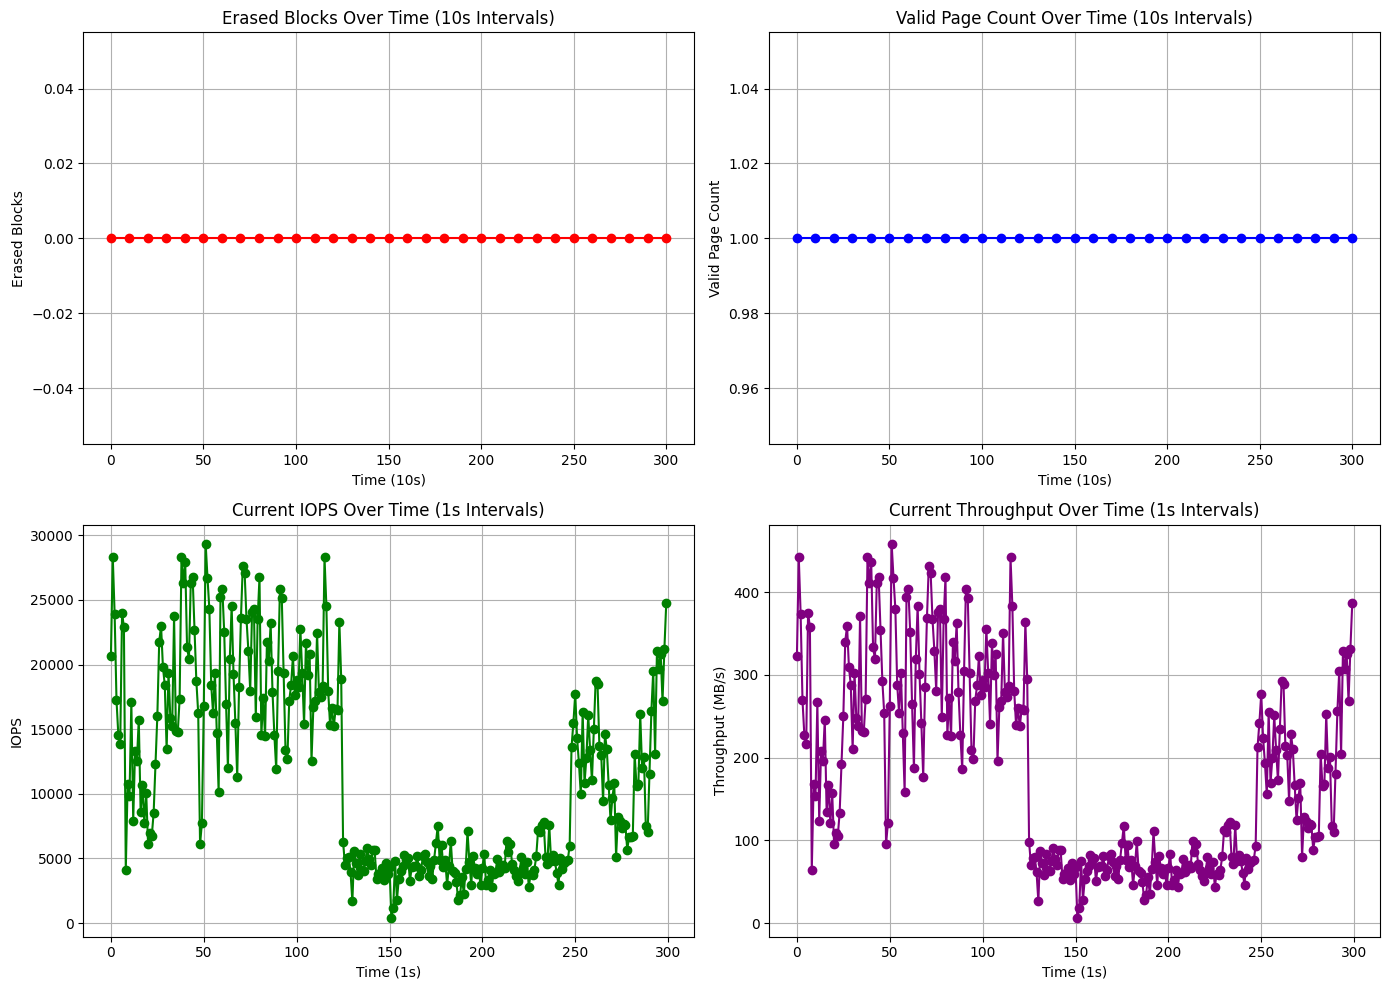

In [37]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# 로그 파일 경로
log_file_path = 'fio_log_1.txt'

# 데이터 저장을 위한 딕셔너리 초기화
data_10s = {
    'Time (10s)': [],
    'Erased Blocks': [],
    'Valid Page Count': []
}

data_1s = {
    'Time (1s)': [],
    'Current IOPS': [],
    'Current Throughput (MB/s)': []
}

# 정규 표현식을 사용하여 필요한 데이터 패턴 정의
erased_blocks_pattern = re.compile(r'Erased blocks:\s+(\d+)')
valid_page_count_pattern = re.compile(r'Valid page count:\s+(\d+)')
current_iops_pattern = re.compile(r'Current IOPS:\s+(\d+)')
current_throughput_pattern = re.compile(r'Current Throughput:\s+([\d\.]+) MB/s')

# 파일 읽기
with open(log_file_path, 'r') as file:
    lines = file.readlines()

# 데이터 추출
iteration_10s = 0
iteration_1s = 0
line_index = 0
total_lines = len(lines)

while line_index < total_lines:
    line = lines[line_index].strip()

    # Erased blocks
    erased_blocks_match = erased_blocks_pattern.match(line)
    if erased_blocks_match:
        erased_blocks = int(erased_blocks_match.group(1))

        # 다음 줄이 Valid page count인지 확인
        line_index += 1
        while line_index < total_lines and lines[line_index].strip() == '':
            line_index += 1
        if line_index < total_lines:
            valid_line = lines[line_index].strip()
            valid_page_count_match = valid_page_count_pattern.match(valid_line)
            if valid_page_count_match:
                valid_page_count = int(valid_page_count_match.group(1))
                time_10s = iteration_10s * 10
                data_10s['Time (10s)'].append(time_10s)
                data_10s['Erased Blocks'].append(erased_blocks)
                data_10s['Valid Page Count'].append(valid_page_count)
                print(f"10s Interval {time_10s}s: Erased Blocks={erased_blocks}, Valid Page Count={valid_page_count}")
                iteration_10s += 1
        line_index += 1
        continue

    # Current IOPS
    current_iops_match = current_iops_pattern.match(line)
    if current_iops_match:
        current_iops = int(current_iops_match.group(1))
        data_1s['Current IOPS'].append(current_iops)
        data_1s['Time (1s)'].append(iteration_1s)
        print(f"1s Interval {iteration_1s}s: Current IOPS={current_iops}")
        iteration_1s += 1
        line_index += 1
        continue

    # Current Throughput
    current_throughput_match = current_throughput_pattern.match(line)
    if current_throughput_match:
        current_throughput = float(current_throughput_match.group(1))
        data_1s['Current Throughput (MB/s)'].append(current_throughput)
        print(f"1s Interval {iteration_1s-1}s: Current Throughput={current_throughput} MB/s")
        line_index += 1
        continue

    # 기타 라인 무시
    line_index += 1

# 데이터프레임 생성
df_10s = pd.DataFrame(data_10s)
df_1s = pd.DataFrame(data_1s)

# 300초까지 데이터 보강 (없더라도)
max_time_10s = 300
current_time_10s = df_10s['Time (10s)'].max() if not df_10s.empty else 0

while current_time_10s < max_time_10s:
    current_time_10s += 10
    # 이전 값으로 채우거나 0으로 채우기
    last_erased = df_10s['Erased Blocks'].iloc[-1] if not df_10s.empty else 0
    last_valid = df_10s['Valid Page Count'].iloc[-1] if not df_10s.empty else 0
    data_10s['Time (10s)'].append(current_time_10s)
    data_10s['Erased Blocks'].append(last_erased)
    data_10s['Valid Page Count'].append(last_valid)
    iteration_10s +=1

df_10s = pd.DataFrame(data_10s)

# 데이터프레임 출력 (옵션)
print("10초 단위 데이터:")
print(df_10s)
print("\n1초 단위 데이터:")
print(df_1s)

# 그래프 그리기
plt.figure(figsize=(14, 10))

# Erased Blocks (10초 단위)
plt.subplot(2, 2, 1)
plt.plot(df_10s['Time (10s)'], df_10s['Erased Blocks'], marker='o', color='red')
plt.title('Erased Blocks Over Time (10s Intervals)')
plt.xlabel('Time (10s)')
plt.ylabel('Erased Blocks')
plt.grid(True)

# Valid Page Count (10초 단위)
plt.subplot(2, 2, 2)
plt.plot(df_10s['Time (10s)'], df_10s['Valid Page Count'], marker='o', color='blue')
plt.title('Valid Page Count Over Time (10s Intervals)')
plt.xlabel('Time (10s)')
plt.ylabel('Valid Page Count')
plt.grid(True)

# Current IOPS (1초 단위)
plt.subplot(2, 2, 3)
plt.plot(df_1s['Time (1s)'], df_1s['Current IOPS'], marker='o', color='green')
plt.title('Current IOPS Over Time (1s Intervals)')
plt.xlabel('Time (1s)')
plt.ylabel('IOPS')
plt.grid(True)

# Current Throughput (1초 단위)
plt.subplot(2, 2, 4)
plt.plot(df_1s['Time (1s)'], df_1s['Current Throughput (MB/s)'], marker='o', color='purple')
plt.title('Current Throughput Over Time (1s Intervals)')
plt.xlabel('Time (1s)')
plt.ylabel('Throughput (MB/s)')
plt.grid(True)

plt.tight_layout()
plt.savefig('fio_metrics1.png')  # 그래프를 이미지 파일로 저장 (옵션)
plt.show()


1s Interval 0s: Current IOPS=3319
1s Interval 0s: Current Throughput=51.86 MB/s
1s Interval 1s: Current IOPS=2717
1s Interval 1s: Current Throughput=42.45 MB/s
1s Interval 2s: Current IOPS=2804
1s Interval 2s: Current Throughput=43.81 MB/s
1s Interval 3s: Current IOPS=1654
1s Interval 3s: Current Throughput=25.84 MB/s
1s Interval 4s: Current IOPS=2920
1s Interval 4s: Current Throughput=45.62 MB/s
1s Interval 5s: Current IOPS=3652
1s Interval 5s: Current Throughput=57.04 MB/s
1s Interval 6s: Current IOPS=3753
1s Interval 6s: Current Throughput=58.64 MB/s
1s Interval 7s: Current IOPS=3952
1s Interval 7s: Current Throughput=61.75 MB/s
10s Interval 0s: Erased Blocks=1104, Valid Page Count=281322
1s Interval 8s: Current IOPS=4126
1s Interval 8s: Current Throughput=64.47 MB/s
1s Interval 9s: Current IOPS=3406
1s Interval 9s: Current Throughput=53.22 MB/s
1s Interval 10s: Current IOPS=2348
1s Interval 10s: Current Throughput=36.67 MB/s
1s Interval 11s: Current IOPS=4237
1s Interval 11s: Curre

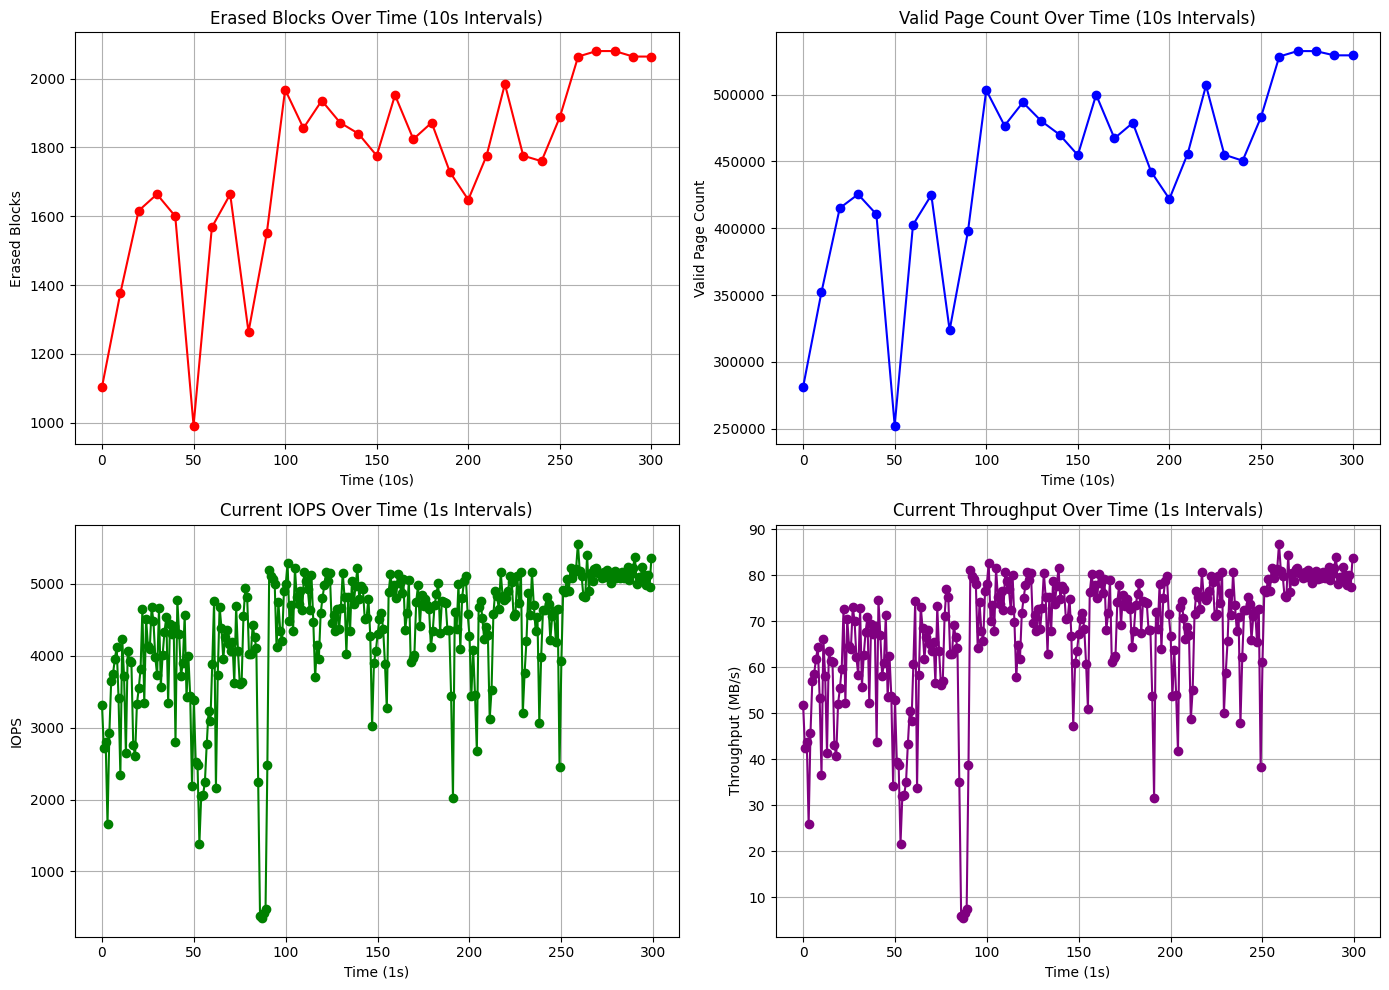

In [36]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# 로그 파일 경로
log_file_path = 'fio_log_3.txt'

# 데이터 저장을 위한 딕셔너리 초기화
data_10s = {
    'Time (10s)': [],
    'Erased Blocks': [],
    'Valid Page Count': []
}

data_1s = {
    'Time (1s)': [],
    'Current IOPS': [],
    'Current Throughput (MB/s)': []
}

# 정규 표현식을 사용하여 필요한 데이터 패턴 정의
erased_blocks_pattern = re.compile(r'Erased blocks:\s+(\d+)')
valid_page_count_pattern = re.compile(r'Valid page count:\s+(\d+)')
current_iops_pattern = re.compile(r'Current IOPS:\s+(\d+)')
current_throughput_pattern = re.compile(r'Current Throughput:\s+([\d\.]+) MB/s')

# 파일 읽기
with open(log_file_path, 'r') as file:
    lines = file.readlines()

# 데이터 추출
iteration_10s = 0
iteration_1s = 0
line_index = 0
total_lines = len(lines)

while line_index < total_lines:
    line = lines[line_index].strip()

    # Erased blocks
    erased_blocks_match = erased_blocks_pattern.match(line)
    if erased_blocks_match:
        erased_blocks = int(erased_blocks_match.group(1))

        # 다음 줄이 Valid page count인지 확인
        line_index += 1
        while line_index < total_lines and lines[line_index].strip() == '':
            line_index += 1
        if line_index < total_lines:
            valid_line = lines[line_index].strip()
            valid_page_count_match = valid_page_count_pattern.match(valid_line)
            if valid_page_count_match:
                valid_page_count = int(valid_page_count_match.group(1))
                time_10s = iteration_10s * 10
                data_10s['Time (10s)'].append(time_10s)
                data_10s['Erased Blocks'].append(erased_blocks)
                data_10s['Valid Page Count'].append(valid_page_count)
                print(f"10s Interval {time_10s}s: Erased Blocks={erased_blocks}, Valid Page Count={valid_page_count}")
                iteration_10s += 1
        line_index += 1
        continue

    # Current IOPS
    current_iops_match = current_iops_pattern.match(line)
    if current_iops_match:
        current_iops = int(current_iops_match.group(1))
        data_1s['Current IOPS'].append(current_iops)
        data_1s['Time (1s)'].append(iteration_1s)
        print(f"1s Interval {iteration_1s}s: Current IOPS={current_iops}")
        iteration_1s += 1
        line_index += 1
        continue

    # Current Throughput
    current_throughput_match = current_throughput_pattern.match(line)
    if current_throughput_match:
        current_throughput = float(current_throughput_match.group(1))
        data_1s['Current Throughput (MB/s)'].append(current_throughput)
        print(f"1s Interval {iteration_1s-1}s: Current Throughput={current_throughput} MB/s")
        line_index += 1
        continue

    # 기타 라인 무시
    line_index += 1

# 데이터프레임 생성
df_10s = pd.DataFrame(data_10s)
df_1s = pd.DataFrame(data_1s)

# 300초까지 데이터 보강 (없더라도)
max_time_10s = 300
current_time_10s = df_10s['Time (10s)'].max() if not df_10s.empty else 0

while current_time_10s < max_time_10s:
    current_time_10s += 10
    # 이전 값으로 채우거나 0으로 채우기
    last_erased = df_10s['Erased Blocks'].iloc[-1] if not df_10s.empty else 0
    last_valid = df_10s['Valid Page Count'].iloc[-1] if not df_10s.empty else 0
    data_10s['Time (10s)'].append(current_time_10s)
    data_10s['Erased Blocks'].append(last_erased)
    data_10s['Valid Page Count'].append(last_valid)
    iteration_10s +=1

df_10s = pd.DataFrame(data_10s)

# 데이터프레임 출력 (옵션)
print("10초 단위 데이터:")
print(df_10s)
print("\n1초 단위 데이터:")
print(df_1s)

# 그래프 그리기
plt.figure(figsize=(14, 10))

# Erased Blocks (10초 단위)
plt.subplot(2, 2, 1)
plt.plot(df_10s['Time (10s)'], df_10s['Erased Blocks'], marker='o', color='red')
plt.title('Erased Blocks Over Time (10s Intervals)')
plt.xlabel('Time (10s)')
plt.ylabel('Erased Blocks')
plt.grid(True)

# Valid Page Count (10초 단위)
plt.subplot(2, 2, 2)
plt.plot(df_10s['Time (10s)'], df_10s['Valid Page Count'], marker='o', color='blue')
plt.title('Valid Page Count Over Time (10s Intervals)')
plt.xlabel('Time (10s)')
plt.ylabel('Valid Page Count')
plt.grid(True)

# Current IOPS (1초 단위)
plt.subplot(2, 2, 3)
plt.plot(df_1s['Time (1s)'], df_1s['Current IOPS'], marker='o', color='green')
plt.title('Current IOPS Over Time (1s Intervals)')
plt.xlabel('Time (1s)')
plt.ylabel('IOPS')
plt.grid(True)

# Current Throughput (1초 단위)
plt.subplot(2, 2, 4)
plt.plot(df_1s['Time (1s)'], df_1s['Current Throughput (MB/s)'], marker='o', color='purple')
plt.title('Current Throughput Over Time (1s Intervals)')
plt.xlabel('Time (1s)')
plt.ylabel('Throughput (MB/s)')
plt.grid(True)

plt.tight_layout()
plt.savefig('fio_metrics3.png')  # 그래프를 이미지 파일로 저장 (옵션)
plt.show()


1s Interval 0s: Current IOPS=4589
1s Interval 0s: Current Throughput=65.4 MB/s
1s Interval 1s: Current IOPS=6532
1s Interval 1s: Current Throughput=93.37 MB/s
1s Interval 2s: Current IOPS=6441
1s Interval 2s: Current Throughput=92.52 MB/s
1s Interval 3s: Current IOPS=6013
1s Interval 3s: Current Throughput=85.53 MB/s
1s Interval 4s: Current IOPS=6052
1s Interval 4s: Current Throughput=86.75 MB/s
1s Interval 5s: Current IOPS=6591
1s Interval 5s: Current Throughput=93.82 MB/s
10s Interval 0s: Erased Blocks=16, Valid Page Count=78623
1s Interval 6s: Current IOPS=6619
1s Interval 6s: Current Throughput=93.63 MB/s
1s Interval 7s: Current IOPS=5930
1s Interval 7s: Current Throughput=84.27 MB/s
1s Interval 8s: Current IOPS=5076
1s Interval 8s: Current Throughput=72.18 MB/s
1s Interval 9s: Current IOPS=5149
1s Interval 9s: Current Throughput=73.2 MB/s
1s Interval 10s: Current IOPS=5264
1s Interval 10s: Current Throughput=75.05 MB/s
1s Interval 11s: Current IOPS=4602
1s Interval 11s: Current Th

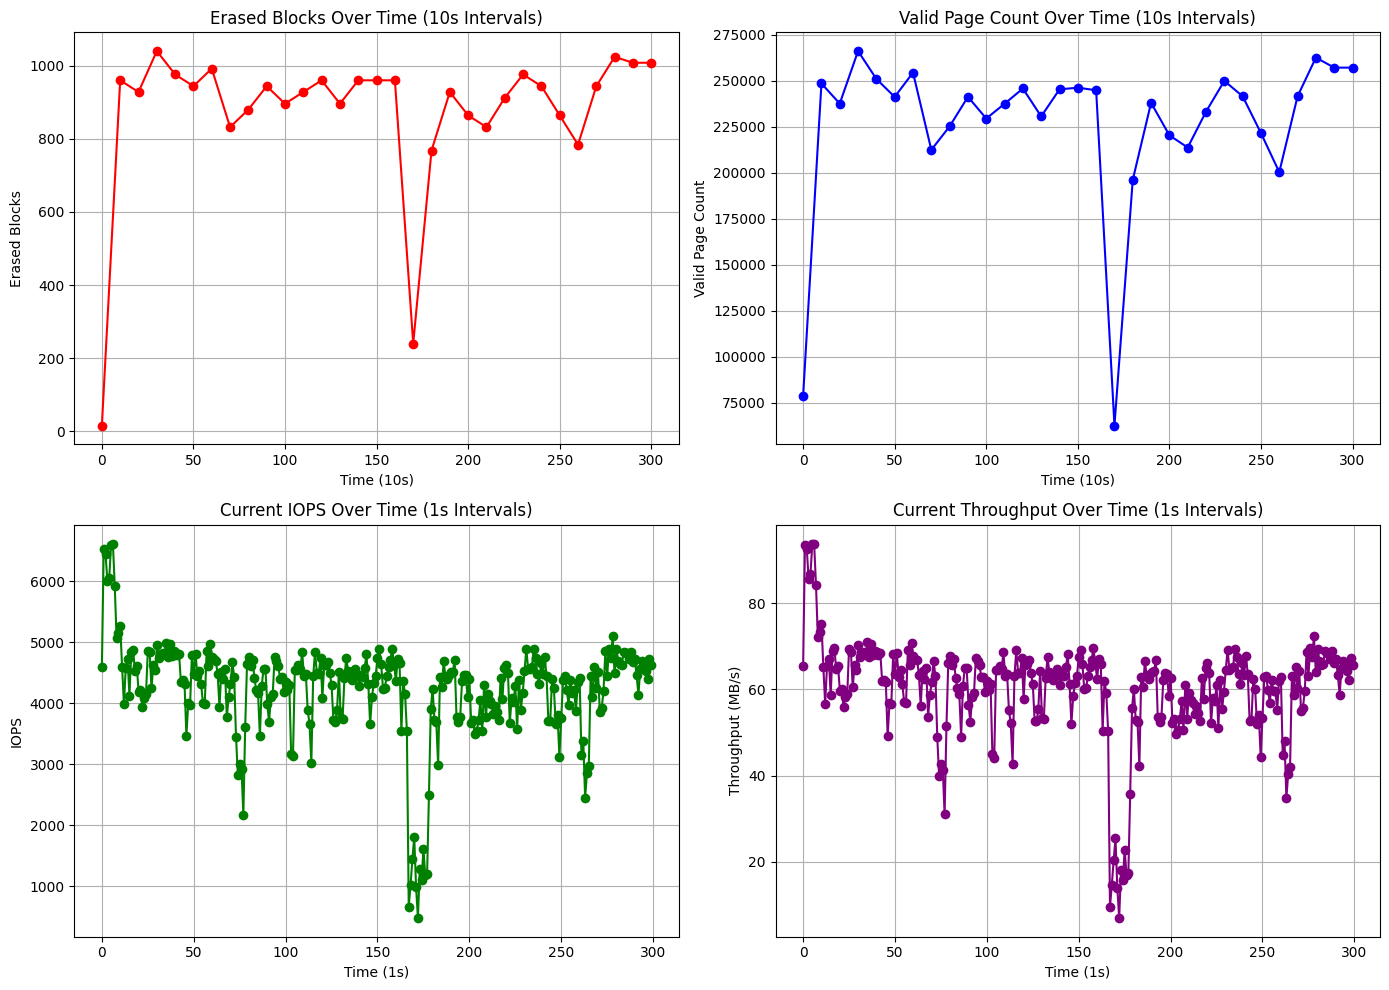

In [38]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# 로그 파일 경로
log_file_path = 'sys_bench_log_1.txt'

# 데이터 저장을 위한 딕셔너리 초기화
data_10s = {
    'Time (10s)': [],
    'Erased Blocks': [],
    'Valid Page Count': []
}

data_1s = {
    'Time (1s)': [],
    'Current IOPS': [],
    'Current Throughput (MB/s)': []
}

# 정규 표현식을 사용하여 필요한 데이터 패턴 정의
erased_blocks_pattern = re.compile(r'Erased blocks:\s+(\d+)')
valid_page_count_pattern = re.compile(r'Valid page count:\s+(\d+)')
current_iops_pattern = re.compile(r'Current IOPS:\s+(\d+)')
current_throughput_pattern = re.compile(r'Current Throughput:\s+([\d\.]+) MB/s')

# 파일 읽기
with open(log_file_path, 'r') as file:
    lines = file.readlines()

# 데이터 추출
iteration_10s = 0
iteration_1s = 0
line_index = 0
total_lines = len(lines)

while line_index < total_lines:
    line = lines[line_index].strip()

    # Erased blocks
    erased_blocks_match = erased_blocks_pattern.match(line)
    if erased_blocks_match:
        erased_blocks = int(erased_blocks_match.group(1))

        # 다음 줄이 Valid page count인지 확인
        line_index += 1
        while line_index < total_lines and lines[line_index].strip() == '':
            line_index += 1
        if line_index < total_lines:
            valid_line = lines[line_index].strip()
            valid_page_count_match = valid_page_count_pattern.match(valid_line)
            if valid_page_count_match:
                valid_page_count = int(valid_page_count_match.group(1))
                time_10s = iteration_10s * 10
                data_10s['Time (10s)'].append(time_10s)
                data_10s['Erased Blocks'].append(erased_blocks)
                data_10s['Valid Page Count'].append(valid_page_count)
                print(f"10s Interval {time_10s}s: Erased Blocks={erased_blocks}, Valid Page Count={valid_page_count}")
                iteration_10s += 1
        line_index += 1
        continue

    # Current IOPS
    current_iops_match = current_iops_pattern.match(line)
    if current_iops_match:
        current_iops = int(current_iops_match.group(1))
        data_1s['Current IOPS'].append(current_iops)
        data_1s['Time (1s)'].append(iteration_1s)
        print(f"1s Interval {iteration_1s}s: Current IOPS={current_iops}")
        iteration_1s += 1
        line_index += 1
        continue

    # Current Throughput
    current_throughput_match = current_throughput_pattern.match(line)
    if current_throughput_match:
        current_throughput = float(current_throughput_match.group(1))
        data_1s['Current Throughput (MB/s)'].append(current_throughput)
        print(f"1s Interval {iteration_1s-1}s: Current Throughput={current_throughput} MB/s")
        line_index += 1
        continue

    # 기타 라인 무시
    line_index += 1

# 데이터프레임 생성
df_10s = pd.DataFrame(data_10s)
df_1s = pd.DataFrame(data_1s)

# 300초까지 데이터 보강 (없더라도)
max_time_10s = 300
current_time_10s = df_10s['Time (10s)'].max() if not df_10s.empty else 0

while current_time_10s < max_time_10s:
    current_time_10s += 10
    # 이전 값으로 채우거나 0으로 채우기
    last_erased = df_10s['Erased Blocks'].iloc[-1] if not df_10s.empty else 0
    last_valid = df_10s['Valid Page Count'].iloc[-1] if not df_10s.empty else 0
    data_10s['Time (10s)'].append(current_time_10s)
    data_10s['Erased Blocks'].append(last_erased)
    data_10s['Valid Page Count'].append(last_valid)
    iteration_10s +=1

df_10s = pd.DataFrame(data_10s)

# 데이터프레임 출력 (옵션)
print("10초 단위 데이터:")
print(df_10s)
print("\n1초 단위 데이터:")
print(df_1s)

# 그래프 그리기
plt.figure(figsize=(14, 10))

# Erased Blocks (10초 단위)
plt.subplot(2, 2, 1)
plt.plot(df_10s['Time (10s)'], df_10s['Erased Blocks'], marker='o', color='red')
plt.title('Erased Blocks Over Time (10s Intervals)')
plt.xlabel('Time (10s)')
plt.ylabel('Erased Blocks')
plt.grid(True)

# Valid Page Count (10초 단위)
plt.subplot(2, 2, 2)
plt.plot(df_10s['Time (10s)'], df_10s['Valid Page Count'], marker='o', color='blue')
plt.title('Valid Page Count Over Time (10s Intervals)')
plt.xlabel('Time (10s)')
plt.ylabel('Valid Page Count')
plt.grid(True)

# Current IOPS (1초 단위)
plt.subplot(2, 2, 3)
plt.plot(df_1s['Time (1s)'], df_1s['Current IOPS'], marker='o', color='green')
plt.title('Current IOPS Over Time (1s Intervals)')
plt.xlabel('Time (1s)')
plt.ylabel('IOPS')
plt.grid(True)

# Current Throughput (1초 단위)
plt.subplot(2, 2, 4)
plt.plot(df_1s['Time (1s)'], df_1s['Current Throughput (MB/s)'], marker='o', color='purple')
plt.title('Current Throughput Over Time (1s Intervals)')
plt.xlabel('Time (1s)')
plt.ylabel('Throughput (MB/s)')
plt.grid(True)

plt.tight_layout()
plt.savefig('fio_metrics4.png')  # 그래프를 이미지 파일로 저장 (옵션)
plt.show()


1s Interval 0s: Current IOPS=10602
1s Interval 0s: Current Throughput=167.14 MB/s
1s Interval 1s: Current IOPS=8636
1s Interval 1s: Current Throughput=136.39 MB/s
1s Interval 2s: Current IOPS=11331
1s Interval 2s: Current Throughput=178.58 MB/s
1s Interval 3s: Current IOPS=10899
1s Interval 3s: Current Throughput=171.91 MB/s
1s Interval 4s: Current IOPS=11160
1s Interval 4s: Current Throughput=176.18 MB/s
1s Interval 5s: Current IOPS=11597
1s Interval 5s: Current Throughput=183.11 MB/s
1s Interval 6s: Current IOPS=12561
1s Interval 6s: Current Throughput=198.15 MB/s
1s Interval 7s: Current IOPS=11605
1s Interval 7s: Current Throughput=183.06 MB/s
10s Interval 0s: Erased Blocks=1872, Valid Page Count=478529
1s Interval 8s: Current IOPS=10839
1s Interval 8s: Current Throughput=170.95 MB/s
1s Interval 9s: Current IOPS=11489
1s Interval 9s: Current Throughput=181.33 MB/s
1s Interval 10s: Current IOPS=11057
1s Interval 10s: Current Throughput=174.53 MB/s
1s Interval 11s: Current IOPS=12031


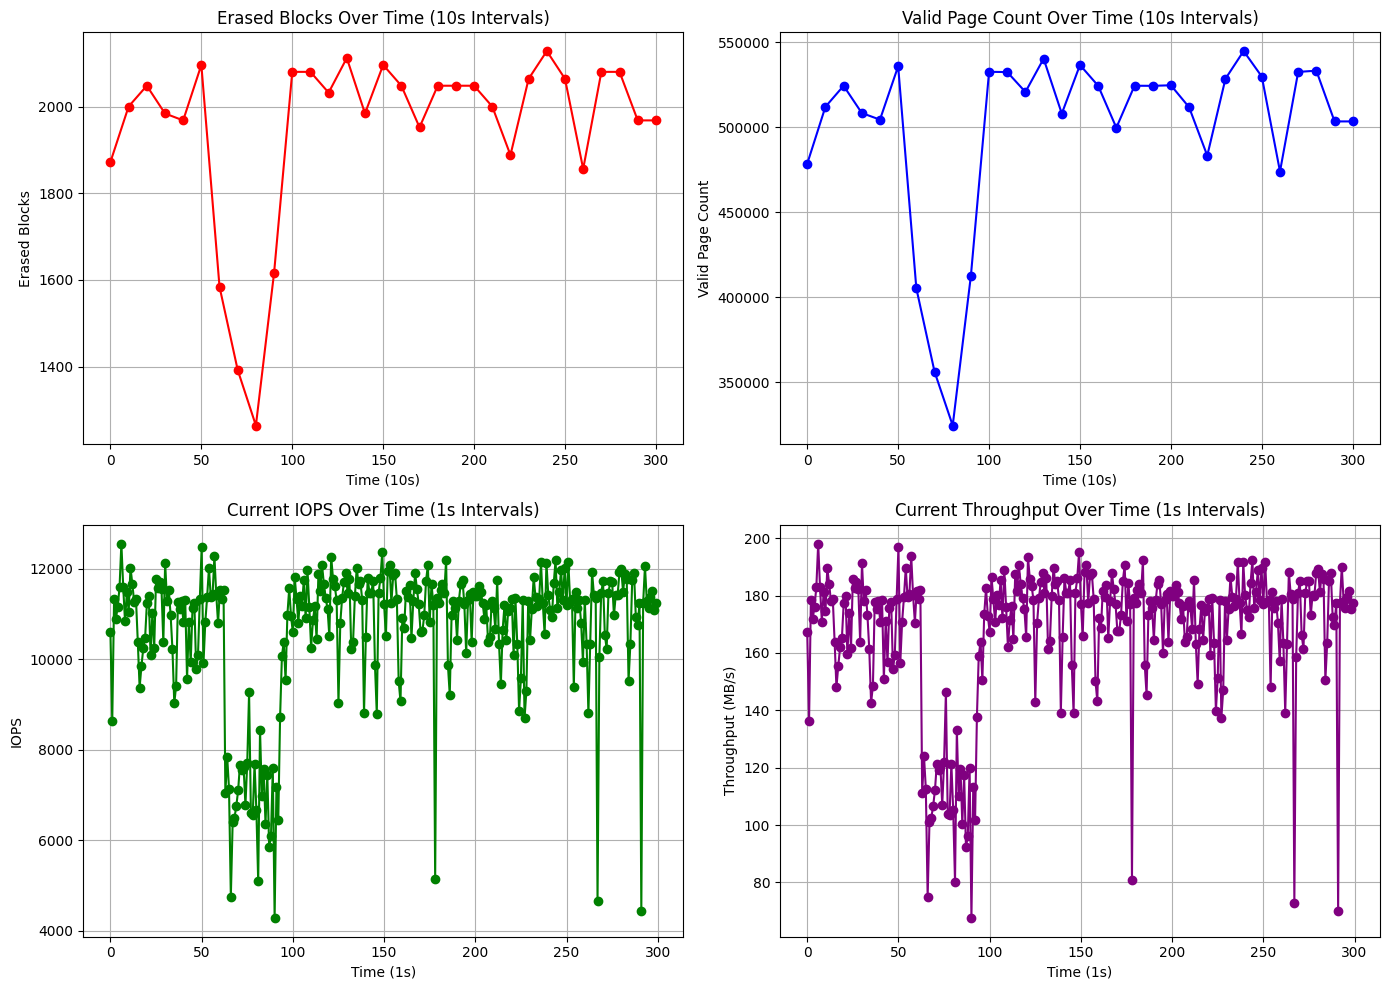

In [39]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# 로그 파일 경로
log_file_path = 'sys_bench_log_2.txt'

# 데이터 저장을 위한 딕셔너리 초기화
data_10s = {
    'Time (10s)': [],
    'Erased Blocks': [],
    'Valid Page Count': []
}

data_1s = {
    'Time (1s)': [],
    'Current IOPS': [],
    'Current Throughput (MB/s)': []
}

# 정규 표현식을 사용하여 필요한 데이터 패턴 정의
erased_blocks_pattern = re.compile(r'Erased blocks:\s+(\d+)')
valid_page_count_pattern = re.compile(r'Valid page count:\s+(\d+)')
current_iops_pattern = re.compile(r'Current IOPS:\s+(\d+)')
current_throughput_pattern = re.compile(r'Current Throughput:\s+([\d\.]+) MB/s')

# 파일 읽기
with open(log_file_path, 'r') as file:
    lines = file.readlines()

# 데이터 추출
iteration_10s = 0
iteration_1s = 0
line_index = 0
total_lines = len(lines)

while line_index < total_lines:
    line = lines[line_index].strip()

    # Erased blocks
    erased_blocks_match = erased_blocks_pattern.match(line)
    if erased_blocks_match:
        erased_blocks = int(erased_blocks_match.group(1))

        # 다음 줄이 Valid page count인지 확인
        line_index += 1
        while line_index < total_lines and lines[line_index].strip() == '':
            line_index += 1
        if line_index < total_lines:
            valid_line = lines[line_index].strip()
            valid_page_count_match = valid_page_count_pattern.match(valid_line)
            if valid_page_count_match:
                valid_page_count = int(valid_page_count_match.group(1))
                time_10s = iteration_10s * 10
                data_10s['Time (10s)'].append(time_10s)
                data_10s['Erased Blocks'].append(erased_blocks)
                data_10s['Valid Page Count'].append(valid_page_count)
                print(f"10s Interval {time_10s}s: Erased Blocks={erased_blocks}, Valid Page Count={valid_page_count}")
                iteration_10s += 1
        line_index += 1
        continue

    # Current IOPS
    current_iops_match = current_iops_pattern.match(line)
    if current_iops_match:
        current_iops = int(current_iops_match.group(1))
        data_1s['Current IOPS'].append(current_iops)
        data_1s['Time (1s)'].append(iteration_1s)
        print(f"1s Interval {iteration_1s}s: Current IOPS={current_iops}")
        iteration_1s += 1
        line_index += 1
        continue

    # Current Throughput
    current_throughput_match = current_throughput_pattern.match(line)
    if current_throughput_match:
        current_throughput = float(current_throughput_match.group(1))
        data_1s['Current Throughput (MB/s)'].append(current_throughput)
        print(f"1s Interval {iteration_1s-1}s: Current Throughput={current_throughput} MB/s")
        line_index += 1
        continue

    # 기타 라인 무시
    line_index += 1

# 데이터프레임 생성
df_10s = pd.DataFrame(data_10s)
df_1s = pd.DataFrame(data_1s)

# 300초까지 데이터 보강 (없더라도)
max_time_10s = 300
current_time_10s = df_10s['Time (10s)'].max() if not df_10s.empty else 0

while current_time_10s < max_time_10s:
    current_time_10s += 10
    # 이전 값으로 채우거나 0으로 채우기
    last_erased = df_10s['Erased Blocks'].iloc[-1] if not df_10s.empty else 0
    last_valid = df_10s['Valid Page Count'].iloc[-1] if not df_10s.empty else 0
    data_10s['Time (10s)'].append(current_time_10s)
    data_10s['Erased Blocks'].append(last_erased)
    data_10s['Valid Page Count'].append(last_valid)
    iteration_10s +=1

df_10s = pd.DataFrame(data_10s)

# 데이터프레임 출력 (옵션)
print("10초 단위 데이터:")
print(df_10s)
print("\n1초 단위 데이터:")
print(df_1s)

# 그래프 그리기
plt.figure(figsize=(14, 10))

# Erased Blocks (10초 단위)
plt.subplot(2, 2, 1)
plt.plot(df_10s['Time (10s)'], df_10s['Erased Blocks'], marker='o', color='red')
plt.title('Erased Blocks Over Time (10s Intervals)')
plt.xlabel('Time (10s)')
plt.ylabel('Erased Blocks')
plt.grid(True)

# Valid Page Count (10초 단위)
plt.subplot(2, 2, 2)
plt.plot(df_10s['Time (10s)'], df_10s['Valid Page Count'], marker='o', color='blue')
plt.title('Valid Page Count Over Time (10s Intervals)')
plt.xlabel('Time (10s)')
plt.ylabel('Valid Page Count')
plt.grid(True)

# Current IOPS (1초 단위)
plt.subplot(2, 2, 3)
plt.plot(df_1s['Time (1s)'], df_1s['Current IOPS'], marker='o', color='green')
plt.title('Current IOPS Over Time (1s Intervals)')
plt.xlabel('Time (1s)')
plt.ylabel('IOPS')
plt.grid(True)

# Current Throughput (1초 단위)
plt.subplot(2, 2, 4)
plt.plot(df_1s['Time (1s)'], df_1s['Current Throughput (MB/s)'], marker='o', color='purple')
plt.title('Current Throughput Over Time (1s Intervals)')
plt.xlabel('Time (1s)')
plt.ylabel('Throughput (MB/s)')
plt.grid(True)

plt.tight_layout()
plt.savefig('fio_metrics5.png')  # 그래프를 이미지 파일로 저장 (옵션)
plt.show()
